In [1]:
from pathlib import Path
from pprint import pprint
from ost import Sentinel1Batch
from ost.helpers import vector, raster
import json

# load username and pw to access sentinel files
username = json.load(open('login_data.json'))['username']
pw = json.load(open('login_data.json'))['pw']

# define the project directory
project_dir = Path.home() / "Documents" / "Python" / "sen1ost" / "data"

# aoi file name
aoi_file = 'test_shape2.geojson'

# define aoi with a 2 point coordinates and create a buffer with 20km radius
vector.buffer_shape(str(project_dir) + '/aoi/' + aoi_file, str(project_dir) + '/aoi/aoi_tmp' ,buffer=0.01)
aoi = vector.aoi_to_wkt(str(project_dir) + '/aoi/aoi_tmp')

# define the start and end date
start = "2020-05-01"
end = "2020-05-31"

# initialize the class to s1_grd instance
s1_grd = Sentinel1Batch(
    project_dir=project_dir,
    aoi=aoi,
    start=start,
    end=end,
    product_type="GRD",
    beam_mode="IW",
    polarisation="*",
    ard_type="OST-RTC", #Radiometrically Terrain Corrected, images are corrected for radiometric distortions along mountainous slopes
    max_workers=8,
)

# do the search
# added scihub username and pw in Project.py line 260
if not s1_grd.inventory_file:
    s1_grd.search()

 INFO (10:28:25): Created project directory at /home/david/Documents/Python/sen1ost/data
 INFO (10:28:25): Downloaded data will be stored in: /home/david/Documents/Python/sen1ost/data/download.
 INFO (10:28:25): Inventory files will be stored in: /home/david/Documents/Python/sen1ost/data/inventory.
 INFO (10:28:25): Processed data will be stored in: /home/david/Documents/Python/sen1ost/data/processing.
 INFO (10:28:25): Using /home/david/Documents/Python/sen1ost/data/temp as directory for temporary files.


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


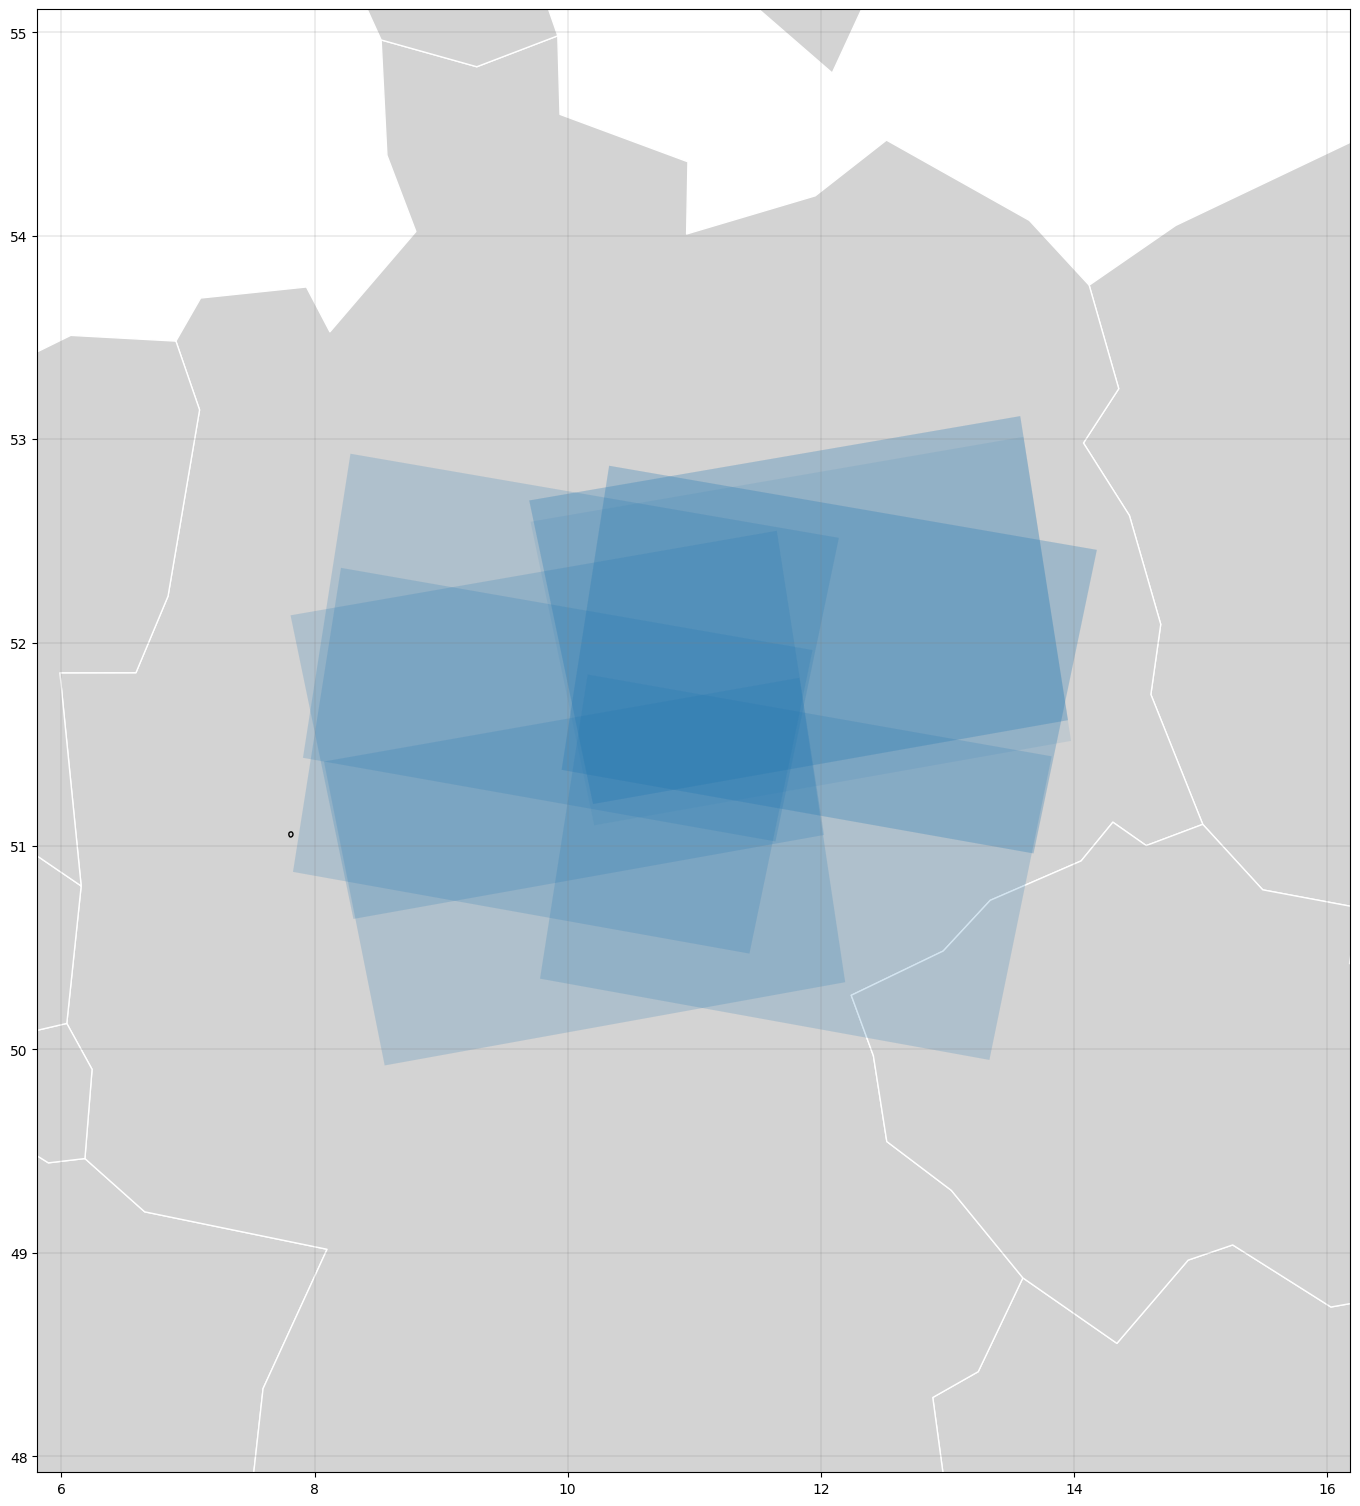

In [5]:
# show orbits / plot inventory
%matplotlib inline
%pylab inline
pylab.rcParams["figure.figsize"] = (19, 19)

s1_grd.plot_inventory(s1_grd.inventory, transparency=0.1)
# s1_grd.inventory

In [3]:
# refine inventory
s1_grd.refine_inventory()

 INFO (10:30:21): Coverage analysis for ASCENDING tracks in VV VH polarisation.
 INFO (10:30:21): 8 frames for ASCENDING tracks in VV VH polarisation.
 INFO (10:30:21): 8 frames remain after double entry removal
 INFO (10:30:21): Excluding track 44
 INFO (10:30:21): Excluding track 117
 INFO (10:30:21): 4 frames remain after non-AOI overlap
 INFO (10:30:21): All remaining tracks fully overlap the AOI. Not removing anything.
 INFO (10:30:22):  4 frames remain after removal of non-full AOI crossing


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/Project.py:352: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  ) = refine_inventory.search_refinement(
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/refine_inventory.py:246: FutureWarning: The fram

 INFO (10:30:22): Found 4 full coverage mosaics.
 INFO (10:30:22): Coverage analysis for DESCENDING tracks in VV VH polarisation.
 INFO (10:30:22): 9 frames for DESCENDING tracks in VV VH polarisation.
 INFO (10:30:22): 9 frames remain after double entry removal
 INFO (10:30:22): Excluding track 168
 INFO (10:30:22): Excluding track 66
 INFO (10:30:22): 5 frames remain after non-AOI overlap
 INFO (10:30:22): All remaining tracks fully overlap the AOI. Not removing anything.


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/refine_inventory.py:433: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df = temp_df.append(track_gdf)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/geopandas/array.py:1406: UserWarning: CRS not set for some of the concatenation inputs. Setting output's CRS as WGS 84 (the single non-null crs provided).
  warnings.warn(
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/refine_inventory.py:451: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_frame = out_frame.append(temp_df)
/home

 INFO (10:30:22):  5 frames remain after removal of non-full AOI crossing
 INFO (10:30:22): Found 5 full coverage mosaics.
--------------------------------------------
 Summing up the info about mosaics
--------------------------------------------

 4 mosaics for mosaic key ASCENDING_VVVH

 5 mosaics for mosaic key DESCENDING_VVVH


/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/refine_inventory.py:246: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_frame = out_frame.append(gdf_date)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/ost/s1/refine_inventory.py:246: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  out_frame = out_frame.append(gdf_date)
/home/david/Documents/Python/sen1ost/.venv/lib/python3.8/site-packages/shapely/set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)
/home/david/Documents/Python/sen1ost/.venv

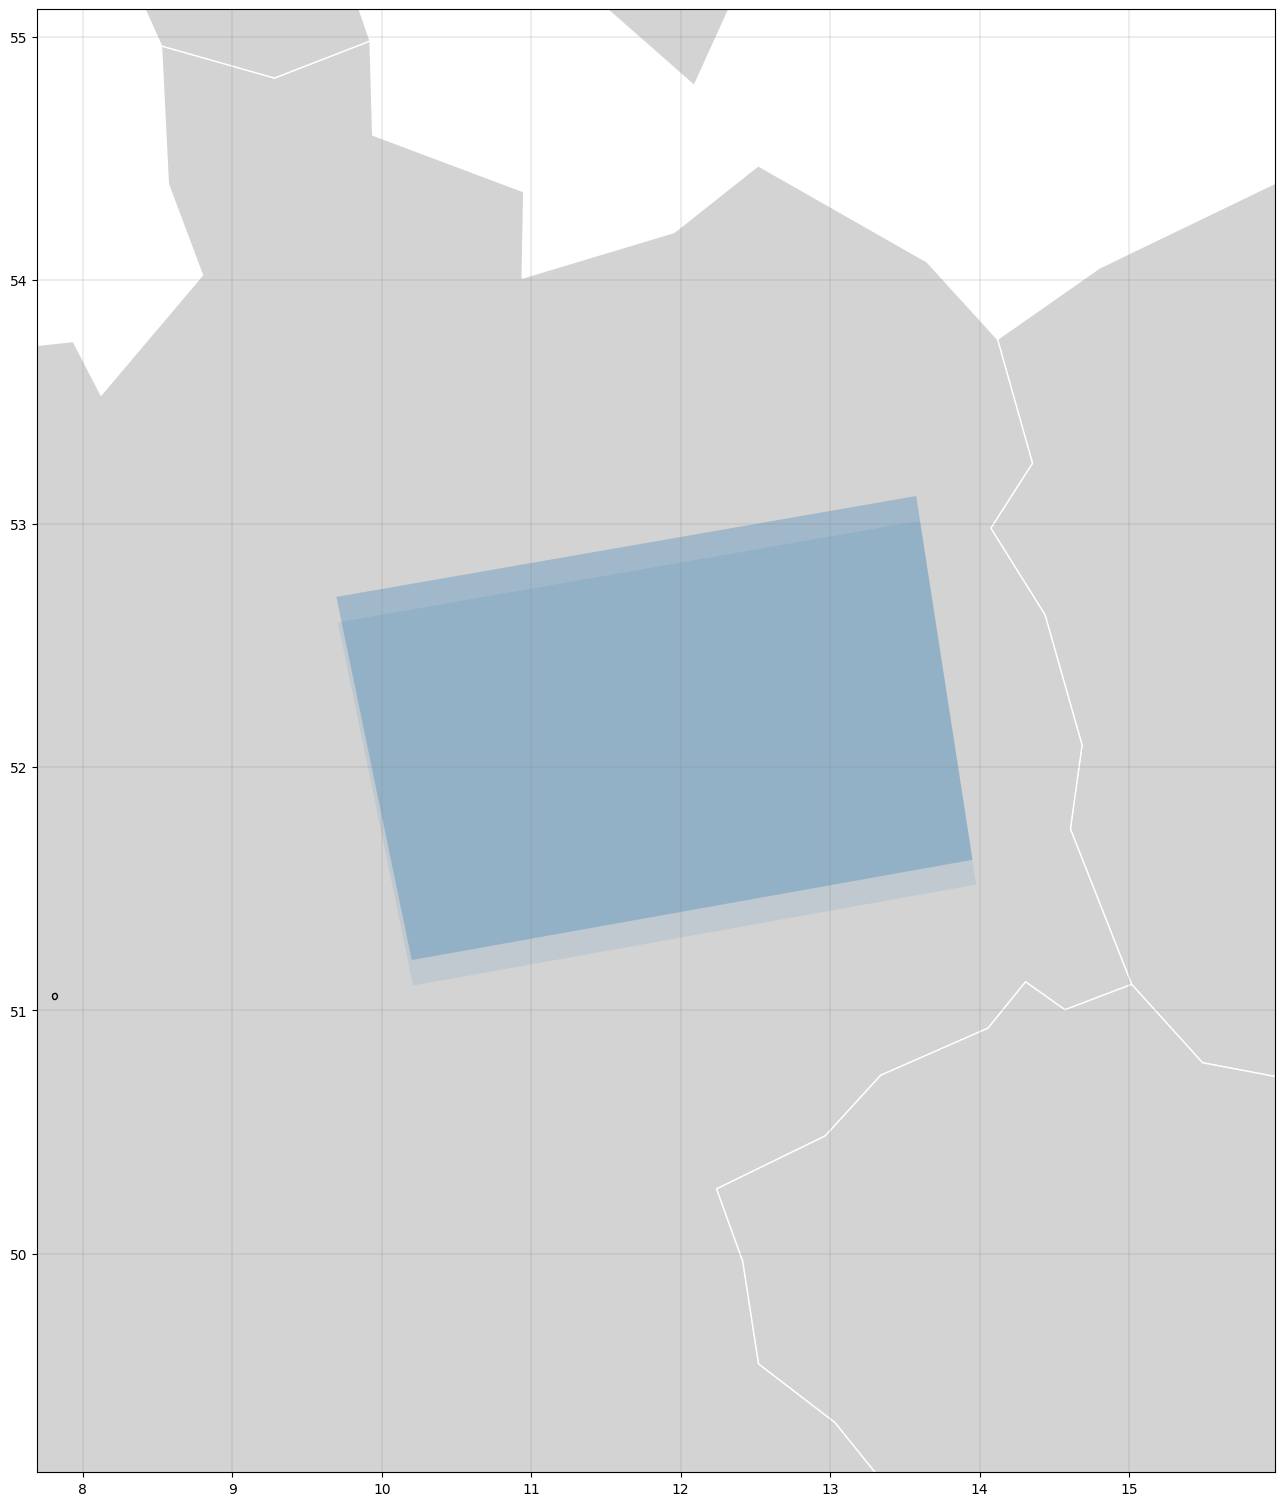

In [6]:
# plot again
pylab.rcParams["figure.figsize"] = (19, 19)
key = "ASCENDING_VVVH"
s1_grd.refined_inventory_dict[key]
s1_grd.plot_inventory(s1_grd.refined_inventory_dict[key], 0.1)

In [4]:
# download ascending orbit images
key = "ASCENDING_VVVH"
s1_grd.download(s1_grd.refined_inventory_dict[key], concurrent=10, mirror = '2', uname=username, pword=pw)

 INFO (11:53:07): All scenes are ready for being processed.


In [7]:
# define ard product specification
from pprint import pprint
# pprint(s1_grd.ard_parameters["single_ARD"])

s1_grd.ard_parameters["single_ARD"]["resolution"] = 10  # set output resolution to 100m
s1_grd.ard_parameters["single_ARD"]["remove_speckle"] = True  # apply a speckle filter
s1_grd.ard_parameters["single_ARD"]["to_db"] = True
# s1_grd.ard_parameters["mosaic"]["cut_to_aoi"] = False
# s1_grd.ard_parameters["single_ARD"]["apply_ls_mask"] = True
# s1_grd.ard_parameters["single_ARD"]["to_tif"] = True
# s1_grd.ard_parameters["single_ARD"]["out_projection"] = 3857

{'apply_ls_mask': False,
 'ard_type': 'OST-RTC',
 'create_ls_mask': True,
 'dem': {'dem_file': '',
         'dem_name': 'Copernicus 30m Global DEM',
         'dem_nodata': 0,
         'dem_resampling': 'BILINEAR_INTERPOLATION',
         'egm_correction': False,
         'image_resampling': 'BICUBIC_INTERPOLATION',
         'out_projection': 4326},
 'geocoding': 'terrain',
 'image_type': 'GRD',
 'polarisation': 'VV, VH, HH, HV',
 'product_type': 'RTC-gamma0',
 'remove_border_noise': True,
 'remove_speckle': False,
 'resolution': 20,
 'speckle_filter': {'ENL': 1,
                    'damping': 2,
                    'estimate_ENL': True,
                    'filter': 'Refined Lee',
                    'filter_x_size': 3,
                    'filter_y_size': 3,
                    'num_of_looks': 1,
                    'pan_size': 50,
                    'sigma': 0.9,
                    'target_window_size': '3x3',
                    'window_size': '7x7'},
 'to_db': False,
 'to_tif': Fa

In [6]:
# preprocess
s1_grd.grds_to_ards(
    inventory_df=s1_grd.refined_inventory_dict[key],
    timeseries=False,
    timescan=False,
    mosaic=True,
    overwrite=True,
    max_workers=8,
)

 INFO (11:53:32): Deleting processing folder to start from scratch
 INFO (11:53:32): Processing acquisition from 20200507 over track 15.
 INFO (11:53:32): Processing acquisition from 20200501 over track 15.
 INFO (11:53:32): Processing acquisition from 20200513 over track 15.
 INFO (11:53:32): Processing acquisition from 20200519 over track 15.
 INFO (11:53:32): Processing acquisition from 20200531 over track 15.
 INFO (11:53:32): Processing acquisition from 20200525 over track 15.
Executing processing graph
Executing processing graph
Executing processing graph
Executing processing graph
Executing processing graph
Executing processing graph
15%30%45%60%.70%15%30%45%60%.70%15%15%30%45%60%.70%30%45%60%.70%.15%30%45%60%.70%90%15%30%45%60%.70%...90%90%90%.90%.90% done.
 done.
 done.
 done.
 done.
 done.
Executing operator...
20%Executing operator...
20%140% done.
60%180% done.
100%60%Writing...
.13%Writing...
.13%Executing operator...
20%Executing operator...
20%Executing operator...
20%Ex

/home/david/Documents/Python/sen1_ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1_ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)
/home/david/Documents/Python/sen1_ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1_ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use panda

.60%180% done.
100%100%Writing...
.13%100% done.
.60%100% done.


/home/david/Documents/Python/sen1_ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1_ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


180%100% done.
100%Writing...
.13%.60%

/home/david/Documents/Python/sen1_ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1_ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


100% done.


/home/david/Documents/Python/sen1_ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:86: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(temp_df)
/home/david/Documents/Python/sen1_ost/.venv/lib/python3.8/site-packages/ost/s1/grd_batch.py:137: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  processing_df = processing_df.append(temp_df)


,identifier,outfile,out_ls,error


In [7]:
# convert img to tiff
import gdal
import os

for u in ['Gamma0_VV_db','Gamma0_VH_db']:
# for u in ['Gamma0_VV','Gamma0_VH']:
    paths = list(Path(project_dir).rglob(str(u + '.img')))
    for i in paths:
        inpath = str(i)
        outpath = str(project_dir) + '/out/' + u + '_' + os.path.split(os.path.split(os.path.split(i)[0])[0])[1] + '.tiff'
        ds = gdal.Open(inpath)
        ds = gdal.Translate(outpath, ds)
        ds = None
        raster.mask_by_shape(outpath,outpath, str(project_dir) + '/aoi/' + aoi_file, rescale=False, description=False, to_db=False)

# %%bash
# gdal_translate -of GTiff /home/david/OST_Tutorials/Tutorial_1/15/20220509/20220509_15_bs.data/Gamma0_VH_db.img /home/david/OST_Tutorials/Tutorial_1/15/20220509/20220509_15_bs.data/Gamma0_VH_db.tiff